## Demo Hidden Markov Chain
Code cài đặt của nhóm được đẩy lên github thành viên Trịnh Quốc Huy (20120013) https://github.com/huyquoctrinh/HiddenMarkovChain.git, các thuật toán được đóng gói thành 1 lớp để tiện cho việc chạy bài demo trên google colab
Dưới đây là đồ thị minh hoạ cho yêu cầu bài toántoán

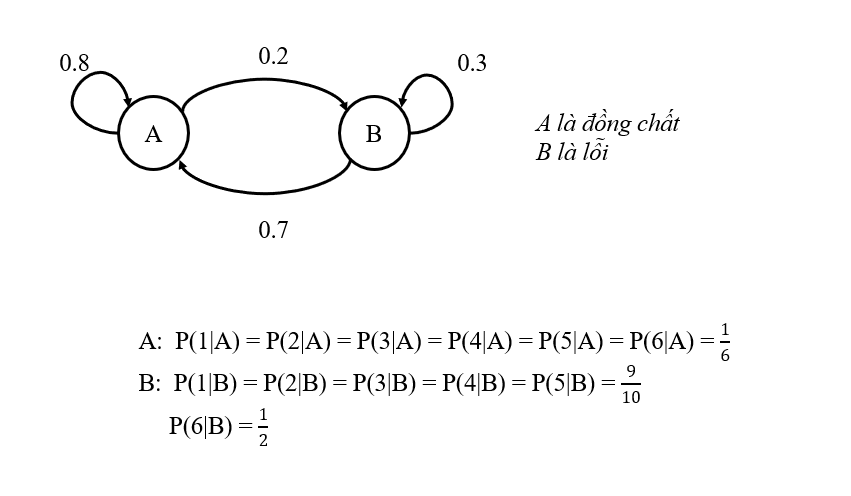

In [ ]:
!git clone https://github.com/huyquoctrinh/HiddenMarkovChain.git

Cloning into 'HiddenMarkovChain'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 35 (delta 14), reused 14 (delta 4), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [ ]:
%cd /content/HiddenMarkovChain

/content/HiddenMarkovChain


Câu 1 được implement trong file model.py

In [ ]:
from model import *
import numpy as np


## Khai báo các biến dựa trên yêu cầu bài toán

Theo đề bài, ta xác định được các biến như sau: \
Các trạng thái: 
- Cân bằng: A 
- Lỗi: B 

Các quan sát chúng ta có thể thu được chính là các kết quả chúng ta đổ xúc sắc bao gồm các kết quả có thể quan sát được là: 1,2,3,4,5,6

In [ ]:
states = ('A', 'B')
possible_observation = ('1','2','3','4','5','6')


Sau đấy chúng ta sẽ tiếp tục khai báo các giá trị:
- Start probability: mặc định chúng ta gắn là 0.5
- transition probability (xác suất chuyển dịch): \
  - Cân bằng: (Cân bằng: 0.2 , lỗi: 0.8)
  - Lỗi : (Cân bằng: 0.7 , lỗi: 0.3)
- emission probability (xác suất loại bỏ) với:
  - Cân bằng: xác suất là 1/6 cho toàn bộ mặt
  - Lỗi: 0.5 cho mặt số 6 và 0.1 cho toàn bộ mặt còn lại 

In [ ]:
start_probability = np.matrix( '0.8 0.2')
transition_probability = np.matrix('0.8 0.2 ;  0.7 0.3 ')
tmp_prob = 1/6
emission_probability = np.matrix(' {} {} {} {} {} {}  ; 0.1 0.1 0.1 0.1 0.1 0.5'.format(tmp_prob,tmp_prob,tmp_prob,tmp_prob,tmp_prob,tmp_prob))

Nhóm tiến hành khởi tạo 1 chuỗi dữ liệu theo mô tả bài toán 2b trong mẫu hàm generate_test

In [ ]:
def accuracy(a,b):
  res = 0
  for i in range(len(a)):
    if (a[i] == b[i]):
      res+=1
  return res/len(a)

In [ ]:
def generate_test(length, initial_prob,possible_states,possible_observations,emission_probability,transition_probability):
  states_arr = []
  observations_arr = []
  check = {'A':0,'B':1}
  initial_state = np.random.choice(states, p = np.array(start_probability)[0])
  initial_observation = np.random.choice(possible_observation, p = np.array(emission_probability)[check[initial_state]] )
  states_arr.append(initial_state)
  observations_arr.append(initial_observation)
  for i in range(1,length):
    tmp_state = np.random.choice(possible_states, p = np.array(transition_probability)[check[states_arr[i-1]]])
    tmp_observation = np.random.choice(possible_observation, p = np.array(emission_probability)[check[tmp_state]])
    states_arr.append(tmp_state)
    observations_arr.append(tmp_observation)
  return states_arr,observations_arr
s,o = generate_test(100,start_probability,states,possible_observation,emission_probability,transition_probability)
print("Number of sample states:",len(s))
print("Number of sample observation:",len(o))
# print(len(s),";",len(0))

Number of sample states: 100
Number of sample observation: 100


## Khai báo object Hidden Markov Model với các giá trị được khai báo
Đây chính là mô hình được sử dụng để giải quyết bài toán, với câu 2a, các biến số được dùng là các trạng thái (states, các quan sát có thể xảy ra, xác suất ban đầu, xác suất chuyển dịch, xác suất loại bỏ

In [ ]:
hmm = HMM(states,possible_observation,start_probability,transition_probability,emission_probability)

Dự đoán các trạng thái dựa trên thuật toán Viterbi, các trạng thái thu được là A và B với A là đồng chất và B là lỗi với đề câu 2c

Dưới đây là minh họa thuật toán viterbi với 1 lần thí nghiệm

In [ ]:
vit_out = (hmm.viterbi(o))
print("Result of {} sample".format(len(vit_out)))
print("Prediction:",vit_out)
print("acc",accuracy(vit_out,s))

Result of 100 sample
Prediction: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
acc 0.8


Nhóm tiến hành thí nghiệm với chuỗi T = 100 và lặp lại khoảng 1000 lần, kết quả thu được vào khoảng từ 0.75 đến 0.88 cho độ chính xác

In [ ]:
from tqdm import tqdm
def test_viterbi(iter,hmm):
  start_probability = np.matrix( '0.8 0.2')
  transition_probability = np.matrix('0.8 0.2 ;  0.7 0.3 ')
  tmp_prob = 1/6
  emission_probability = np.matrix(' {} {} {} {} {} {}  ; 0.1 0.1 0.1 0.1 0.1 0.5'.format(tmp_prob,tmp_prob,tmp_prob,tmp_prob,tmp_prob,tmp_prob))
  test_res = []
  print("Wait for a minute")
  for i in tqdm(range(iter)):
    true_states,new_observations = generate_test(100,start_probability,states,possible_observation,emission_probability,transition_probability) 
    vit_out = hmm.viterbi(new_observations)
    test_res.append(accuracy(vit_out,true_states))
  print(test_res)
  print("Result on {} experiments".format(len(test_res)))
  test_res = np.array(test_res)
  return np.mean(test_res)

In [ ]:
print(test_viterbi(1000,hmm))

Wait for a minute


100%|██████████| 1000/1000 [00:13<00:00, 72.96it/s]

[0.75, 0.79, 0.77, 0.77, 0.78, 0.79, 0.83, 0.8, 0.85, 0.69, 0.74, 0.75, 0.81, 0.81, 0.8, 0.78, 0.72, 0.73, 0.76, 0.86, 0.74, 0.79, 0.73, 0.84, 0.74, 0.78, 0.86, 0.77, 0.84, 0.77, 0.78, 0.72, 0.83, 0.8, 0.84, 0.83, 0.82, 0.79, 0.82, 0.82, 0.72, 0.67, 0.66, 0.76, 0.77, 0.73, 0.74, 0.82, 0.67, 0.81, 0.82, 0.77, 0.75, 0.84, 0.76, 0.78, 0.78, 0.74, 0.72, 0.76, 0.77, 0.84, 0.75, 0.77, 0.76, 0.78, 0.77, 0.78, 0.8, 0.8, 0.73, 0.87, 0.75, 0.75, 0.76, 0.82, 0.85, 0.77, 0.78, 0.76, 0.79, 0.63, 0.76, 0.71, 0.76, 0.79, 0.78, 0.82, 0.75, 0.83, 0.73, 0.73, 0.68, 0.77, 0.81, 0.77, 0.81, 0.82, 0.75, 0.79, 0.76, 0.73, 0.78, 0.71, 0.74, 0.77, 0.8, 0.77, 0.73, 0.85, 0.86, 0.72, 0.74, 0.77, 0.71, 0.87, 0.74, 0.7, 0.71, 0.73, 0.82, 0.78, 0.76, 0.83, 0.73, 0.69, 0.75, 0.75, 0.8, 0.8, 0.76, 0.76, 0.75, 0.79, 0.73, 0.79, 0.79, 0.74, 0.78, 0.83, 0.88, 0.78, 0.81, 0.78, 0.75, 0.77, 0.75, 0.75, 0.82, 0.81, 0.86, 0.79, 0.81, 0.83, 0.79, 0.86, 0.79, 0.82, 0.77, 0.73, 0.85, 0.67, 0.74, 0.71, 0.8, 0.83, 0.81, 0.78, 0

Sử dụng thuật toán Baum-Welch để ước lượng các tham số của mô hình Markov với sample observations được sinh ra ở trêntrên, với số lần lặp lại thí nghiệm là iter 1000

Các tham số thu được là inital probability, transition probability và emission probability được in ra trong quá trình chạy code để trả lời cho câu 2d

In [ ]:
num_iter=1000
e,t,s = hmm.BW([o],num_iter,[100,1])
print("emission probability:",e)
print("transition probability:",t)
print("start probability:",s)

emission probability: [[0.21822677 0.20917534 0.14868679 0.15893919 0.17693712 0.0880348 ]
 [0.17280564 0.15851704 0.10072582 0.10958468 0.13863633 0.31973049]]
transition probability: [[0.83362911 0.16637089]
 [0.74770276 0.25229724]]
start probability: [[0.90283027 0.09716973]]
